# Widgets

MatPlotLib's [widgets](https://matplotlib.org/stable/api/widgets_api.html) are an excellent way to help an audience gain an understanding of how a transformation revealed a pattern in the data, or how data changes as several parameters are varied.

Consider using widgets to allow an audience to explore a dataset themselves, and to intuitively display how data changes over several dimensions.

Some of MatPlotLib's [demos](https://matplotlib.org/2.0.2/examples/widgets/index.html) for widgets are included here.

## Setup

To use widgets, we have to have our notebooks configured correctly. Be sure to use the `%matplotlib widget` directive when using widgets in a notebook.


In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

## Button Example

We can use buttons in MatPlotLib provide a user with a discrete selection.


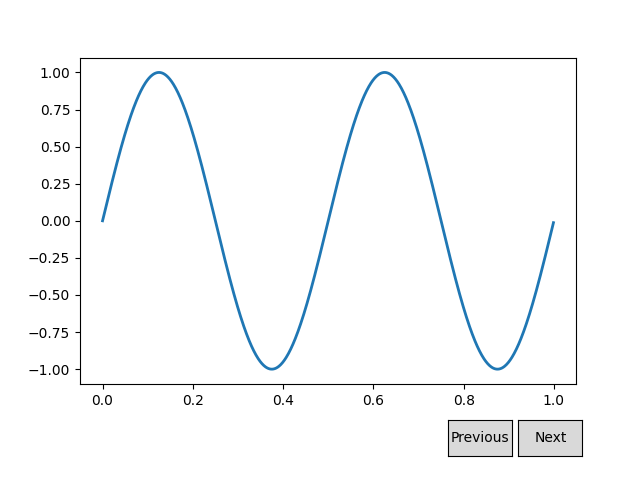

In [2]:
frequencies = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2 * np.pi * frequencies[0] * t)
(l,) = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(frequencies)
        ydata = np.sin(2 * np.pi * frequencies[i] * t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(frequencies)
        ydata = np.sin(2 * np.pi * frequencies[i] * t)
        l.set_ydata(ydata)
        plt.draw()


callback = Index()
previous_axis = plt.axes([0.7, 0.05, 0.1, 0.075])
next_axis = plt.axes([0.81, 0.05, 0.1, 0.075])
next_button = Button(next_axis, "Next")
next_button.on_clicked(callback.next)
previous_button = Button(previous_axis, "Previous")
previous_button.on_clicked(callback.prev)

plt.show()

## Sliders

We can use sliders to provide a user with the ability to change a continuously varying parameter.

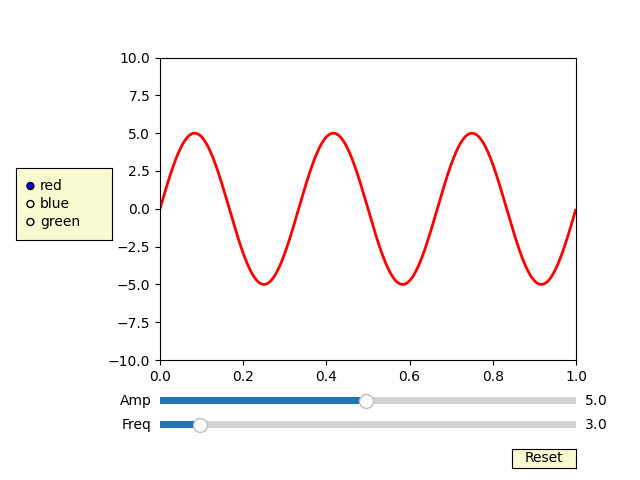

In [3]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0 * np.sin(2 * np.pi * f0 * t)
(l,) = plt.plot(t, s, lw=2, color="red")
plt.axis([0, 1, -10, 10])

axis_color = "lightgoldenrodyellow"
axis_frequency = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
axis_amplitude = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)

slider_frequency = Slider(axis_frequency, "Freq", 0.1, 30.0, valinit=f0)
slider_amplitude = Slider(axis_amplitude, "Amp", 0.1, 10.0, valinit=a0)


def update(val):
    amp = slider_amplitude.val
    freq = slider_frequency.val
    l.set_ydata(amp * np.sin(2 * np.pi * freq * t))
    fig.canvas.draw_idle()


slider_frequency.on_changed(update)
slider_amplitude.on_changed(update)

reset_axis = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(reset_axis, "Reset", color=axis_color, hovercolor="0.975")


def reset(event):
    slider_frequency.reset()
    slider_amplitude.reset()


button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
radio = RadioButtons(rax, ("red", "blue", "green"), active=0)


def color_function(label):
    l.set_color(label)
    fig.canvas.draw_idle()


radio.on_clicked(color_function)

plt.show()